In [2]:
import sys
sys.path.append("..")
from library import *

In [17]:
tau = 3
psi0 = np.ones(4) * 0.5
m_values = np.arange(1, 5)

energies = np.zeros(shape=(len(m_values), 3))
fids = np.zeros(len(m_values))

for i, m in enumerate(m_values):
    h2qc = H2QCircuit(m=m, tau=tau, trot_reps=10)
    h2qc.run_simulation(num_shots=1)
    qc_state = h2qc.final_state
    qc_state = normalize(qc_state[::2 ** (m * 2)])
    
    ham = h2qc.get_hamilt_op(n=2, radius=0.45).to_matrix()
    qc_energy = get_energy(qc_state, ham)
    energies[i, 0] = qc_energy
    
    gs_energy, gs_state = get_ground_eigh(ham)
    # energies[i, 0] = gs_energy
    
    # ite_op = get_ite(ham, tau)
    # ite_state = normalize(ite_op @ psi0)
    # ite_energy = get_energy(ite_state, ham)
    # energies[i, 2] = ite_energy
    
    fids[i] = get_fidelity(qc_state, gs_state)
    
    print(f"Simulation {i+1} for m={m} done!")

Simulation 1 for m=1 done!
Simulation 2 for m=2 done!
Simulation 3 for m=3 done!
Simulation 4 for m=4 done!


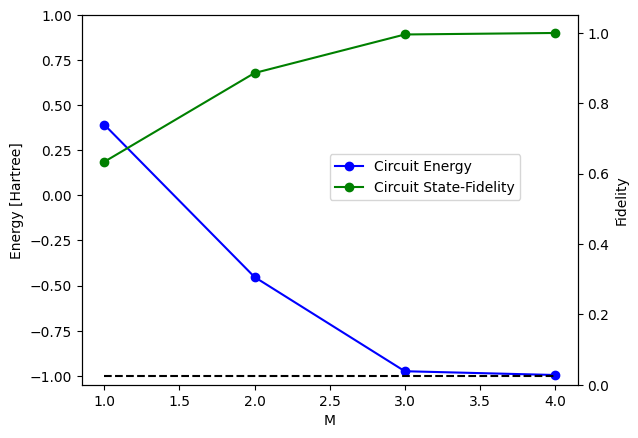

In [20]:
colors = ["green", "blue", "green", "gray"]

plot1 = plt.plot(m_values, energies[:, 0], label="Circuit Energy", color=colors[1], marker='o')
plt.hlines(y=-1, xmin=m_values[0], xmax=m_values[-1], color="black", ls="--")

plt.xlabel(r"M")
plt.ylabel(r"Energy [Hartree]")
plt.ylim(-1.05, 1)

y2 = plt.gca().twinx()
y2.set_ylim(0, 1.05)
y2.set_yticks(np.arange(0, 1.1, 0.2))
y2.set_yticklabels([f"{x:.1f}" for x in np.arange(0, 1.1, 0.2)])
y2.set_ylabel("Fidelity")
plot4 = plt.plot(m_values, fids, label="Circuit State-Fidelity", color=colors[0], marker='o')
plt.legend(loc=(0.5, 0.5), handles=[plot1[0], plot4[0]]);

# plt.title(r"State-Fidelity and Energy with different bond lengths");